In [5]:
# Preparations
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
import seaborn as sns
from IPython.display import Latex
import warnings
from PrettyTable import PrettyTable
from functools import partial
from PrettyFigure import PrettyFigure
warnings.filterwarnings("ignore", module="matplotlib")
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['savefig.dpi'] = 75

# plt.rcParams['figure.autolayout'] = False
# plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams['font.family'] = "STIX"
plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"

sns.set(color_codes=True)

def average(data):
    return 1 / len(data) * sum(data)

def error(data, average_of_data):
    s = sum([(x - average_of_data)**2 for x in data])
    return math.sqrt(s / (len(data) * (len(data) - 1)))

def std_deviation(error_of_average, length_of_dataset):
    return error_of_average * math.sqrt(length_of_dataset)

def average_with_weights(data, weights):
    d = data
    w = weights
    return (d * w**-2).sum() / (w**-2).sum()

def error_with_weights(weights):
    w = weights
    return 1 / math.sqrt((w**-2).sum())

def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    return (d * w**-2).sum() / (w**-2).sum()

def werr(group, weight_name):
    return 1 / math.sqrt((group[weight_name]**-2).sum())

# Arbeitsgrundlagen

Im Versuch M1 geht es darum die Geschwindigkeit einer Pistolenkugel auf verschiedene Arten zu bestimmen. Dabei gibt es noch verschiedene Arten von Geschwindigkeiten.

## Flugzeitmethode

Die __mittlere Geschwindigkeit__ eines Objektes kann durch \ref{eq:velocity} berechnet werden.

\begin{equation}
\overline{v} = \frac{s}{t}
\label{eq:velocity}
\end{equation}

Wenn also die Abschusszeit und die Aufprallzeit, sowie die Flugstrecke bekannt sind, so kann die Zeitdifferenz und somit die mittlere Fluggeschwindigkeit des Geschosses ermittelt werden.

## Ballistische Methode

Bei dieser Methode wird ein Schuss auf ein hängendes Pendel abgegeben. Die Gleichungen im folgenden Abschnitt wurden durch den Dozenten zur Verfügung gestellt.

Der Impuls p ist gegeben durch die Gleichung in \ref{eq:impulse}. Dieser Impuls kann beim Aufprall der Pistolenkugel auf ein ballistisches Pendel gemessen werden. Durch den erheblichen Massenunterschied der Kugel und des Pendels bleibt die Kugel stecken. Ein inelastischer Stoss resultiert. Aus diesem Grund wird die komplette kinetische Energie in Wärme umgewandelt. Der Energieerhaltungssatz ist hier also schwierig anwendbar.

\begin{equation}
p = mv = (m + M)\cdot u
\label{eq:impulse}
\end{equation}

Die verbleibende kinetische Energie wird beim Ausschlagen des Pendels in potentielle Hubenergie umgewandelt.
Mithilfe des Energiesatzes wird die Geschwindigkeit u durch die Hubhöhe h mit Gleichung \ref{eq:hubheight} ersetzt.

\begin{equation}
u = \sqrt{2gh}
\label{eq:hubheight}
\end{equation}

![Ballistische Methode](images/pendulum.png)

Aus Grafik \ref{fig:Ballistische Methode} können die Gleichungen \ref{eq:h} und \ref{eq:cosphi} bestimmt werden.

\begin{equation}
h = l \cdot (1 - cos\varphi)
\label{eq:h}
\end{equation}

\begin{equation}
\cos\varphi = \frac{a}{\sqrt{a^2 + x^2}}
\label{eq:cosphi}
\end{equation}

Da der Schwerpunkt und somit die Länge l des Pendels nur ungenau ermittelt werden können, wird ein Umweg über die Schwingungsdauer T ersichtlich in \ref{eq:Schwingungsdauer} gewählt.

\begin{equation}
T = 2\pi\cdot\sqrt{\frac{l}{g}}
\label{eq:Schwingungsdauer}
\end{equation}

Daraus resultiert die Gleichung \ref{eq:u}.

\begin{equation}
u = \frac{g}{2\pi}\cdot T\cdot\sqrt{2\cdot\Bigg(1-\frac{1}{\sqrt{1 + (\frac{x}{a})^2}}\Bigg)}
\label{eq:u}
\end{equation}

Mit je einer Taylorentwicklung kann die Gleichung \ref{eq:u} auf Gleichung \ref{eq:u_taylor} angenähert werden.

\begin{equation}
u = \frac{g}{2\pi}\cdot\frac{M+m}{m}\cdot T\cdot\frac{x}{a}\cdot\Bigg[1-\frac{3}{8}\cdot\Big(\frac{x}{a}\Big)^2\Bigg]
\label{eq:u_taylor}
\end{equation}

Da die Taylorreihe nur bis zum Grad 2 entwickelt wurde, wäre der nächste Term der Grässenordnung $10^{-4}$. Es ergibt sich also ein sehr genauer Wert.

Somit sind während des Experimentes die Grössen m, M, a, x und T zu bestimmen.

## Drehstossmethode

Bei dieser Methode wird ein Geschoss wie in Abbildung \ref{fig:Drehstossmethode} gezeigt ein Geschoss auf eine um eine starre Achse frei drehbar gelagerte Hantel abgeschossen. Die Gleichungen im folgenden Abschnitt wurden durch den Dozenten zur Verfügung gestellt.

![Drehstossmethode](images/drehstoss.png)

Für eine mit v geradlinig bewegte Punktmasse m kann der Drehimpuls bezüglich der Drehachse a mit Gleichung \ref{eq:drehimpuls} bestimmt werden.

\begin{equation}
\vec{L_a}=\vec{r}\times\vec{p}=m\cdot (\vec{r}\times\vec{v})
\label{eq:drehimpuls}
\end{equation}

Ferner ist bekannt, dass wie in Gleichung \ref{eq:gesamtdrehimpuls} beschrieben, der Gesamtdrehimpuls des Systems erhalten bleibt.

\begin{equation}
L_a=L_{a,Kugel}+L_{a,Hantel}=const.
\label{eq:gesamtdrehimpuls}
\end{equation}

Daraus folgt, dass für die anfänglich ruhende Hantel Gleichung \ref{eq:ruhe} gilt welche dann gleichzusetzen ist mit der Gleichung \ref{eq:bewegung} der bewegten Hantel nach dem Aufprall.

\begin{equation}
L_a=m\cdot d\cdot v+0
\label{eq:ruhe}
\end{equation}

\begin{equation}
L_a=\omega\cdot(I_{a,H}+m\cdot d^2)
\label{eq:bewegung}
\end{equation}

Daraus abgeleitet ergibt sich für die Geschwindigkeit der Pistolenkugel beim Aufprall die Gleichung \ref{eq:vdrehstoss}, wobei $I_{a,H}$ dem Inneren Moment der Hantel bezüglich a und $\omega$ der Winkelgeschwingikeit der Hantel um die Achse a entspricht.

\begin{equation}
v=\omega\cdot\bigg(\frac{I_{a,H}}{m\cdot d}+d\bigg)
\label{eq:vdrehstoss}
\end{equation}

Somit sind für dieses Experiment die Grössen $I_{a,H}$, m, d und $\omega$ zu bestimmen.

$I_{a,H}$ kann bestimmt werden mit Gleichung \ref{eq:inertia}. Hierbei ist $I{a,H_0}$ das Moment der Hantel ohne Gewichte. Es wird durch den Dozenten geliefert. $m$ ist die Masse eines Gewichtes und $d$ der Abstand zum Mittelpunkt der Hantel. Die Gleichung kann hergeleitet werden durch das Innere Moment einer Punktmasse erhalten mit Gleichung \ref{eq:J_punktmasse}. Da zwei Gewichte vorhanden sind wird dieses doppelt addiert und dem Moment der Hantel ohne Gewichte hinzugefügt.

\begin{equation}
I_{a,P}=m*r^2
\label{eq:J_punktmasse}
\end{equation}

\begin{equation}
I_{a,H}=2*m*d^2 + I{a,H_0}
\label{eq:inertia}
\end{equation}

## Einfluss des Luftwiderstandes auf die Geschossgeschwindigkeit

Bisher wurde gezeigt wie die mittlere, sowie die Aufprallgeschwindigkeit ermittelt werden können. Interessant ist aber auch die Mündungsgeschwindigkeit des Geschosses. Zur berechnung dieser wurden die Gleichungen im Folgenden durch den Dozenten zur Verfügung gestellt.

Diese kann man sehr gut über den wirkenden Luftwiderstand bestimmen. Der Luftwiderstand ist gegeben durch die Beziehung in \ref{eq:luftwiderstand}, wobei v die Momentangeschwidigkeit des Geschosses, A die Querschnittfläche jenes Geschosses, $\rho_L$ die Luftdichte und c_w der Widerstandsbeiwert des Projektils sind.

\begin{equation}
F_L=\frac{1}{2}c_\omega\cdot A\cdot\rho_L\cdot v^2
\label{eq:luftwiderstand}
\end{equation}

Das Projektil verliert ebensoviel Kinetische Energie wie der Luftwiderstand Bremsarbeit verrichtet. Dies is mit Gleichungen \ref{eq:kinetische_energie} und \ref{eq:kinetische_energie_eingesetzt} ersichtlich.

\begin{equation}
dE_{kin}=-F_Lds
\label{eq:kinetische_energie}
\end{equation}

\begin{equation}
m\cdot v\cdot dv=-\frac{1}{2}c_\omega\cdot A\cdot\rho_L\cdot v^2\cdot ds
\label{eq:kinetische_energie_eingesetzt}
\end{equation}

Daraus kann die Differenzengleichung \ref{eq:kin_diff} gebildet werden. Mit den Anfangsbedingungen s = 0 und v = $v_0$ wird Gleichung \ref{eq:v0} erhalten. Diese kann für sehr kleine $k\cdot s$ mit \ref{eq:v0_approx} angenähert werden. $k$ ist in allen diesen Gleichungen mit dem Term $k = \frac{c_\omega\cdot A\cdot\rho_L}{2m}$ zu beziffern.

\begin{equation}
\frac{dv}{v}=-k\cdot ds
\label{eq:kin_diff}
\end{equation}

\begin{equation}
v=v_0\cdot e^{-k\cdot s}
\label{eq:v0}
\end{equation}

\begin{equation}
v=v_0\cdot (1-k\cdot s)
\label{eq:v0_approx}
\end{equation}

# Versuchsaufbau

# Versuchsdurchführung

Für alle drei im Versuch angewandten Methoden zur Bestimmung der Projektilgeschwindigkeit (Flugzeitmethode, ballistische Methode, Drehstossmethode) wurde der Versuchsaufbau vermessen. So konnten folgende Parameter bestimmt werden:

In [6]:
# define base values and measurements

v1_s = 0.500
v1_sb1 = 1.800
v1_sb2 = 1.640
v1_m = np.mean([0.47, 0.46, 0.46, 0.46, 0.46, 0.47, 0.46, 0.46, 0.46, 0.46, 4.65 / 10]) * 1e-3
v1_T = np.mean([28.68 / 10, 28.91 / 10])

v1_cw = 0.75
v1_cw_u = 0.08
v1_A = 4*1e-6
v1_pl = 1.2041

def air_resistance(s, v):
    k = v1_cw * v1_A * v1_pl / 2 / v1_m
    v0 = v / (1 - k * s)
    return v0

<center>
    <t>Strecke zwischen den Lichtschranken:</t> $s$ = {{v1_s}}  
    <t>Strecke zwischen Mündung und Pendel:</t> $s_{B1}$ = {{v1_sb1}}  
    <t>Strecke zwischen Mündung und Hantel:</t> $s_{B2}$ = {{v1_sb2}}  
    <t>Masse des Projektils im Mittel:</t> $m$ = {{'{0:.2f}'.format(v1_m)}}  
    <t>Mittlere Schwingungsdauer des Pendels:</t> $T$ = {{'{0:.2f}'.format(v1_T)}}  
    <t>Die Querschnittsfläche eines Projektils:</t> $A$ = {{v1_A}}  
    TODO: v1_cw, v1_pl
</center>

## Ballistische Methode

Erst wurden 10 Messungen mit der ballistischen Methode durchgeführt. Hierbei wird ein Schuss auf ein Pendel abgefeuert.
Es wurde zum einen die Zeit die vergeht bis das Projektil beide Lichtschranken passiert hat gemessen und zum anderen wurde der Ausschlag des Pendels gemessen.

Da in der Pendelgleichung der Luftwiderstand sowie der Reibungswiderstand der Aufhängung nicht berücksichtigt sind, wurden pro Schuss 5 Messungen des Ausschlages gemacht. Mit linearer Regression kann somit der korrekte erste Ausschlag gefunden werden. So ist nämlich der Y-Achsenabschnitt der Fit-Gerade gerade der um den Luftwiderstand korrigierte erste Ausschlag.
Wichtig dabei ist, dass für die Messungen der Amplituden n-0.75 anstelle von n verwendet wird. Denn bei Messung der ersten Amplitude sind ja schon 0.25 Schwingungen vergangen, etc.

Damit besser gezählt werden konnte, wurde nur jeder fünfte Ausschlag am oberen Ende des Lineals gemessen. Somit wurden die Amplituden zu den Schwingungszeiten [0.25, 5.25, 10.25, 15.25, 20.25] gemessen. Diese führen nun mit einem Linearen Fit zum gesuchten um die Nichtidealitäten korrigierten Ergebnis.

Dieses Verfahren ist in Grafik \ref{fig:luftwiderstand_fit} gut zu sehen. Dieses wurde für alle zehn abgegeben Schuss durchgeführt, hier aber nur für den ersten Schuss grafisch dargestellt.

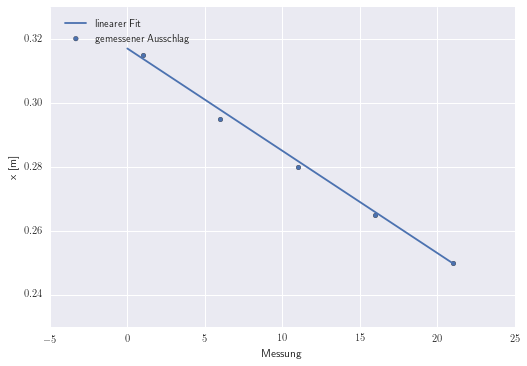

In [7]:
# Evaluate Data

# Read Data
v1_df = pd.read_csv('data/ballistisch.csv')
v1_M = 0.09836
v1_l = 1.973
v1_g = 9.80705

# Plot only one graph of the linear fit
df = pd.read_csv('data/ballistsisch_0.csv')
slope, intercept, r, p, sem = stats.linregress(df['measurement'] + 0.25, df['x'])
n = np.linspace(0, 21, 100)

ax = df.plot(kind='scatter', x='measurement', y='x', label='gemessener Ausschlag')
plt.plot(n, [i * slope + intercept for i in n], label='linearer Fit', axes=ax)
plt.xlabel('Messung')
plt.ylabel('x [m]')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.close(ax.figure)

figure = PrettyFigure(ax.figure, label='fig:luftwiderstand_fit', caption='Lineare Regression zur bestimmung des maximalen Ausschlages des Pendels, falls keinerlei Unidealitäten dieses beeinflussen.')
figure.show()

Es resultiert in Grafik \ref{fig:luftwiderstand_fit} also ein maximaler Ausschlag von {{'{0:.2f}'.format(intercept)}}m. In diesem sind bereits jegliche Verluste berücksichtigt.

### Mittlere Geschwindigkeiten

Dieses Verfahren wurde für alle zehn Messungen durchgeführt. Nun kann aus Gleichung \ref{eq:u_taylor} die Aufprallgeschwindigkeit errechnet werden.

Die errechneten mittleren Geschwindigkeiten sind in Grafik \ref{fig:v_ballistisch} in Relation gesetzt.

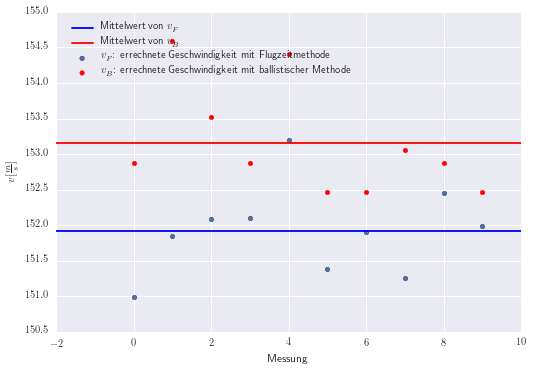

In [12]:
# Calculate mean velocity in air
v1_df['v_flug'] = pd.Series(v1_s / v1_df['t'])

# Calculate all x from the measurements
v1_x = []
for n in range(10):
    df = pd.read_csv('data/ballistsisch_{}.csv'.format(n))
    slope, intercept, r, p, sem = stats.linregress(df['measurement'] + 0.25, df['x'])
    v1_x.append(intercept)
v1_df['x'] = pd.Series(v1_x)

# Calculate all v_B at impact
v1_k = v1_g / (2 * math.pi) * (v1_M + v1_m) / v1_m / v1_l * v1_T
v1_b = 1 - 3 / 8 * (v1_df['x'] / v1_l)**2
v1_df['v_ballistic'] = pd.Series(v1_k * v1_df['x'] * v1_b)

v1_mean = v1_df.mean()

# Plot calculated velocities
ax = v1_df.plot(kind='scatter', x='measurement', y='v_flug', label='$v_F$: errechnete Geschwindigkeit mit Flugzeitmethode')
plt.scatter(v1_df['measurement'], v1_df['v_ballistic'], label='$v_B$: errechnete Geschwindigkeit mit ballistischer Methode', color='red', axes=ax)
plt.axhline(y=v1_mean['v_flug'], axes=ax, color='blue', label='Mittelwert von $v_F$')
plt.axhline(y=v1_mean['v_ballistic'], axes=ax, color='red', label='Mittelwert von $v_B$')
plt.xlabel('Messung')
plt.ylabel('$v[\\frac{m}{s}]$')
#plt.ylim([150, 160])
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.close(ax.figure)

figure = PrettyFigure(ax.figure, label='fig:v_ballistisch', caption='Aufprallgeschwindigkeiten der Kugel durch Ballistische Methode errechnet, im Vergleich zu den jeweiligen Geschwindigkeiten, welche durch die Flugzeitmethode berechnet wurden.')
figure.show()

### Vergleich der Messmethoden

Um die Messmethoden vergleichen zu können wurden alle _einzelnen_ errechneten Geschwindigkeiten mithilfe der Luftwiderstandskorrekturgleichung \ref{eq:v0_approx} auf einen Bezugspunkt, in diesem Falle wurde die Mündung gewählt, umgerechnet.
Hier wurde für die Strecke der Flugzeitmethode $s$ = $\frac{s}{2}$ und für die Strecke der ballistischen Methode $s$ = $s_{B1}$ gewählt.

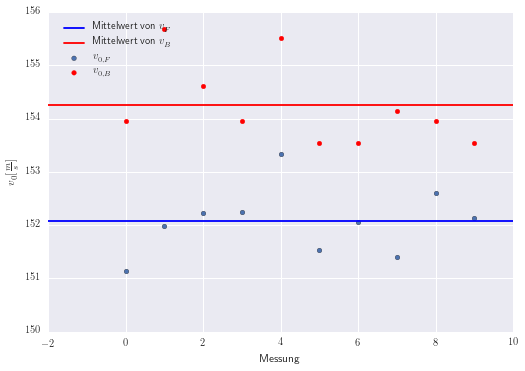

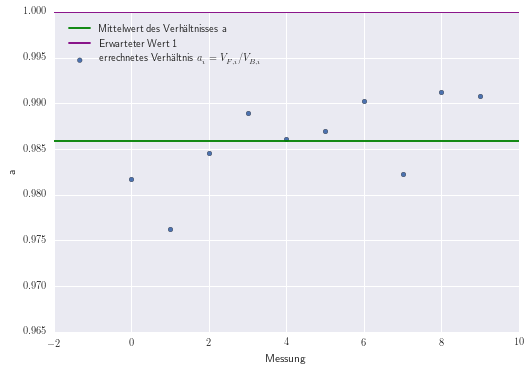

In [13]:
# Luftwiderstandskorrektur single and mean calculation

v1_flug_muendung = pd.Series(list(map(partial(air_resistance, v1_s / 2), v1_df['v_flug'])))
v1_ballistic_muendung = pd.Series(list(map(partial(air_resistance, v1_sb1), v1_df['v_ballistic'])))
v1_a = v1_flug_muendung / v1_ballistic_muendung
v1_a_mean = np.mean(v1_a)
v1_a_sem = stats.sem(v1_a)
v1_df['a'] = v1_a
v1_df['v_flug_muendung'] = v1_flug_muendung
v1_df['v_ballistic_muendung'] = v1_ballistic_muendung

v1_mean = v1_df.mean()

ax = v1_df.plot(kind='scatter', x='measurement', y='v_flug_muendung', label='$v_{0,F}$')
plt.scatter(v1_df['measurement'], v1_df['v_ballistic_muendung'], label='$v_{0,B}$', color='red', axes=ax)
plt.axhline(y=v1_mean['v_flug_muendung'], axes=ax, color='blue', label='Mittelwert von $v_F$')
plt.axhline(y=v1_mean['v_ballistic_muendung'], axes=ax, color='red', label='Mittelwert von $v_B$')
plt.ylabel('$v_0 [\\frac{m}{s}]$')
plt.xlabel('Messung')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.close(ax.figure)

figure = PrettyFigure(ax.figure, label='fig:laufzeiten_luft_v_balllistisch_mean', caption='Die Geschwindigkeiten errechnet mit der Flugzeit- und der ballistischen Methode an Mündung im Vergleich.')
figure.show()

ax = v1_df.plot(kind='scatter', x='measurement', y='a', label='errechnetes Verhältnis $a_i = V_{F,i}/V_{B,i}$')
plt.axhline(y=v1_a_mean, axes=ax, label='Mittelwert des Verhältnisses a', color='green')
plt.axhline(y=1, axes=ax, label='Erwarteter Wert 1', color='purple')
plt.xlabel('Messung')
plt.ylabel('a')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.close(ax.figure)

figure = PrettyFigure(ax.figure, label='fig:laufzeiten_luft_v_balllistisch_mean_ratio', caption='Die mittleren Geschwindigkeiten errechnet mit der Flugzeit- und der ballistischen Methode an Mündung im Verhältnis dargestellt und ihr erwarteter Wert von 1 zum Vergleich.')
figure.show()

### Streuung der Mündungsgeschwindigkeit

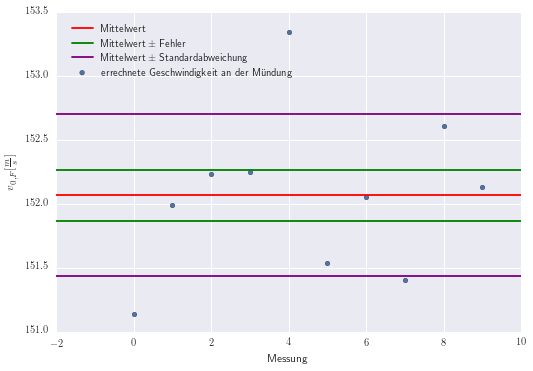

In [16]:
# Plot different methods with sem

v1_mean = v1_df.mean()['v_flug_muendung']
v1_sem = v1_df.sem()['v_flug_muendung']
v1_std = v1_df.std()['v_flug_muendung']
ax = v1_df.plot(kind='scatter', x='measurement', y='v_flug_muendung', label='errechnete Geschwindigkeit an der Mündung')
plt.axhline(y=v1_mean, axes=ax, color='red', label='Mittelwert')
plt.axhline(y=v1_mean+v1_sem, axes=ax, color='green', label='Mittelwert ± Fehler')
plt.axhline(y=v1_mean-v1_sem, axes=ax, color='green')
plt.axhline(y=v1_mean+v1_std, axes=ax, color='purple', label='Mittelwert ± Standardabweichung')
plt.axhline(y=v1_mean-v1_std, axes=ax, color='purple')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.xlabel('Messung')
plt.ylabel('$v_{0,F} [\\frac{m}{s}]$')
plt.close(ax.figure)

figure = PrettyFigure(ax.figure, label='fig:laufzeiten_luft_muendung', caption='Die Mündungsgeschwindigkeiten errechnet mit der Flugzeitmethode. Dazu ihr Mittelwert und der Bereich der Standardabweichung.')
figure.show()

In Grafik \ref{fig:muendungsgeschwindigkeiten} sind die mithilfe der Flugzeitmethode und der Luftwiderstandskorrektur errechneten Mündungsgeschwindigkeiten gezeigt.

## Drehstossmethode

Hierbei wurde ein Geschoss auf eine horizontal drehbare Hantel abgefeuert. Dabei wurde wieder die Flugzeit innerhalb der Lichtschranken gemessen. Diesmal wurde jedoch zusätlich noch die Zeit die die Hantel für eine halbe Umdrehung benötigt gemessen. Damit konnte die Winkelgeschwindigkeit $\omega$ durch Gleichung \ref{eq:omega} bestimmt werden.

\begin{equation}
\omega=\frac{2\cdot\pi}{T}
\label{eq:omega}
\end{equation}

Mithilfe der errechneten Gleichung \ref{eq:vdrehstoss} konnte die Geschwindikeit des Projektiles bestimmt werden. Dabei wurde die Gleichung in \ref{eq:innertia} zur bestimmung der Trägheitsmomente der Beiden Hanteln mit unterschiedlichen Gewichten verwendet.

Die Messresultate aus beiden Versuchen sind im Folgenden Teil dargestellt.
Es wird ein Vergleich dieser Methodik zur Flugzeitmethode angestellt.

### Mittlere Geschwindigkeiten

Um die verschiedenen Methoden gut vergleichen zu können wurden die Mittelwerte der Flugzeitmethode und der Drehstossmethode errechnet.

Die errechneten mittleren Geschwindigkeiten und ihre Unsicherheiten sind in Grafik \ref{fig:laufzeiten_luft_v_drehstoss} in Relation gesetzt.

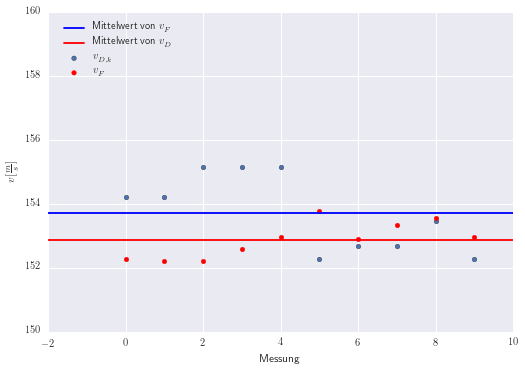

In [17]:
# Evaluate Data

# Calculate inertia
v2_d = np.array([92e-3, 91e-3])
v2_m = np.array([np.mean([15.86, 15.88])*1e-3, np.mean([42.03, 42.13])*1e-3])

# Inertia

v2_J = v2_m * v2_d**2

v2_J3 = 7.4e-5
v2_J3_u = 0.1e-5

# Read Data
v2_df = pd.read_csv('data/drehstoss.csv')

v2_df['omega'] = math.pi / v2_df['T_2']

v2_df['v_drehstoss'] = v2_df['omega'] * ((v2_J[v2_df['m']] * 2 + v2_J3) / (v2_d[v2_df['m']] * v1_m) + v2_d[v2_df['m']])
v2_df['v_flug'] = v1_s / v2_df['t']

v2_mean = v2_df.mean()

ax = v2_df.plot(kind='scatter', x='measurement', y='v_drehstoss', label='$v_{D,k}$')
plt.scatter(v2_df['measurement'], v2_df['v_flug'], label='$v_{F}$', color='red', axes=ax)
plt.axhline(y=v2_mean['v_drehstoss'], axes=ax, color='blue', label='Mittelwert von $v_F$')
plt.axhline(y=v2_mean['v_flug'], axes=ax, color='red', label='Mittelwert von $v_D$')
plt.ylabel('$v [\\frac{m}{s}]$')
plt.xlabel('Messung')
plt.ylim([150, 160])
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.close(ax.figure)

figure = PrettyFigure(ax.figure, label='fig:v_luft_v_drehstoss', caption='Die Geschwindigkeiten errechnet mit der Flugzeit- und der Drehstossmethode mit je fünf Messungen beider Gewichten im Vergleich.')
figure.show()

### Vergleich der Messmethoden

Um die Messmethoden vergleichen zu können wurden alle _einzelnen_ errechneten Geschwindigkeiten mithilfe der Luftwiderstandskorrekturgleichung \ref{eq:v0_approx} auf einen Bezugspunkt, in diesem Falle wurde die Mündung gewählt, umgerechnet.

Hier wurde für die Strecke der Flugzeitmethode $s$ = $\frac{s}{2}$ und für die Strecke der Drehstossmethode $s$ = $s_{B2}$ gewählt.

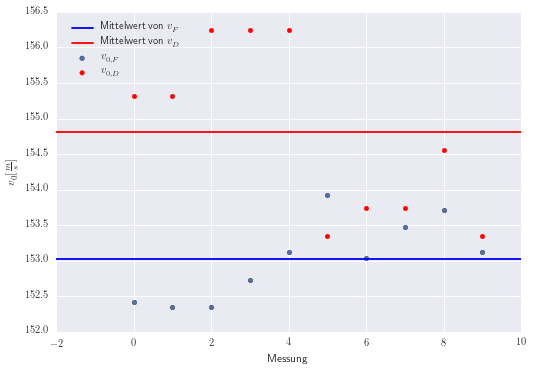

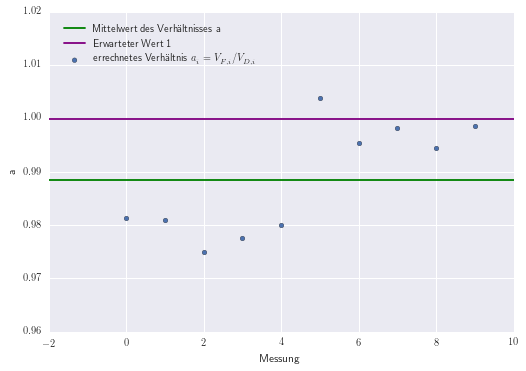

In [25]:
# Luftwiderstandskorrektur single and mean calculation

v2_mean = v2_df.mean()
v2_sem = v2_df.sem()
v2_df['v_flug_muendung'] = pd.Series(list(map(partial(air_resistance, v1_s / 2), v2_df['v_flug'])))
v2_df['v_drehstoss_muendung'] = pd.Series(list(map(partial(air_resistance, v1_sb1), v2_df['v_drehstoss'])))
v2_df['a'] = v2_df['v_flug_muendung'] / v2_df['v_drehstoss_muendung']

v2_mean = v2_df.mean()

ax = v2_df.plot(kind='scatter', x='measurement', y='v_flug_muendung', label='$v_{0,F}$')
plt.scatter(v2_df['measurement'], v2_df['v_drehstoss_muendung'], label='$v_{0,D}$', color='red', axes=ax)
plt.axhline(y=v2_mean['v_flug_muendung'], axes=ax, color='blue', label='Mittelwert von $v_F$')
plt.axhline(y=v2_mean['v_drehstoss_muendung'], axes=ax, color='red', label='Mittelwert von $v_D$')
plt.ylabel('$v_0 [\\frac{m}{s}]$')
plt.xlabel('Messung')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.close(ax.figure)

figure = PrettyFigure(ax.figure, label='fig:laufzeiten_luft_v_drehstoss_mean', caption='Die Geschwindigkeiten errechnet mit der Flugzeit- und der Drehstossmethode an Mündung im Vergleich.')
figure.show()

ax = v2_df.plot(kind='scatter', x='measurement', y='a', label='errechnetes Verhältnis $a_i = V_{F,i}/V_{D,i}$')
plt.axhline(y=v2_mean['a'], axes=ax, label='Mittelwert des Verhältnisses a', color='green')
plt.axhline(y=1, axes=ax, label='Erwarteter Wert 1', color='purple')
plt.xlabel('Messung')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.close(ax.figure)

figure = PrettyFigure(ax.figure, label='fig:laufzeiten_luft_v_drehstoss_mean_ratio', caption='Die mittleren Geschwindigkeiten errechnet mit der Flugzeit- und der Drehstossmethode an Mündung im Verhältnis dargestellt und ihr erwarteter Wert von 1 zum Vergleich.')
figure.show()

# Fehlerrechnung

## Ballistische Methode

Die Mittelwerte der ballistischen Methode unterscheiden sich um {{'{0:.2f}'.format(abs(v1_mean['v_flug'] - v1_mean['v_ballistic']))}}$\frac{m}{s}$. Dies sind zwar nur {{'{0:.2f}'.format((1 - v1_mean['v_flug'] / v1_mean['v_ballistic']) * 100)}}%, jedoch muss diesem Unterschied auf den Grund gegangen werden.

Zuerst wurde dafür der statistische Fehler gerechnet. Vieleicht liegt dieser ja im akzeptablen Bereich. 

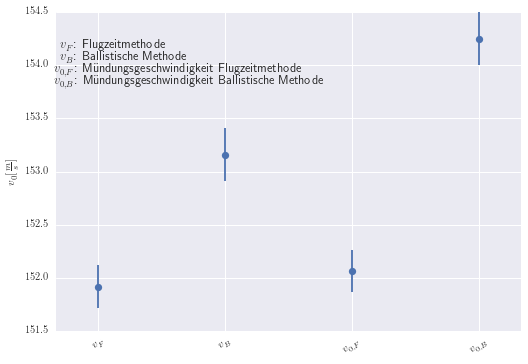

In [20]:
# Plot different methods with sem

v1_mean = v1_df.mean()
v1_sem = v1_df.sem()

v1_flug_muendung_mean = air_resistance(v1_s / 2, v1_mean['v_flug'])
v1_flug_muendung_sem = air_resistance(v1_s / 2, v1_sem['v_flug'])

v1_ballistic_muendung_mean = air_resistance(v1_sb1, v1_mean['v_ballistic'])
v1_ballistic_muendung_sem = air_resistance(v1_sb1, v1_sem['v_ballistic'])

x = [1, 4, 7, 10]
y = [
    v1_mean['v_flug'],
    v1_mean['v_ballistic'],
    v1_flug_muendung_mean,
    v1_ballistic_muendung_mean
]
e = [
    v1_sem['v_flug'],
    v1_sem['v_ballistic'],
    v1_flug_muendung_sem,
    v1_ballistic_muendung_sem
]
labels = ['$v_F$', '$v_B$', '$v_{0,F}$', '$v_{0,B}$']
fig = plt.figure()
plt.errorbar(x, y, yerr=e, fmt='o')
plt.xlim([0, 11])
#plt.ylim([150, 160])
plt.xticks(x, labels, rotation='35')
plt.ylabel('$v_0 [\\frac{m}{s}]$')
plt.text(-0.026, 0.86,'$v_F $: Flugzeitmethode', transform = ax.transAxes)
plt.text(-0.026, 0.82,'$v_B $: Ballistische Methode', transform = ax.transAxes)
plt.text(-0.04, 0.78,'$v_{0,F}$: Mündungsgeschwindigkeit Flugzeitmethode', transform = ax.transAxes)
plt.text(-0.04, 0.74,'$v_{0,B}$: Mündungsgeschwindigkeit Ballistische Methode', transform = ax.transAxes)
plt.close(fig)

figure = PrettyFigure(fig, label='fig:laufzeiten_luft_v_balllistisch', caption='Die mittleren Geschwindigkeiten der ballistischen und Flugzeitmethode im Vergleich mit ihren respektiven mittleren Mündungsgeschwindigkeiten.')
figure.show()

Wie anhand der Fehlerbalken in Grafik \ref{fig:laufzeiten_luft_v_balllistisch} schnell festgestellt werden kann, ist der statistische Fehler relativ gering. Dies bedeutet aber auch, dass der die Fehlerbereiche sich nicht überlappen. Dies ist nicht sehr gut. Denn es gibt nur _eine_ wahre Geschwindigkeit des Projektils. Natürlich kann diese nie genau bestimmt werden. Da sich aber die Fehlerbereiche nicht überlappen muss eine Messung falsch sein oder der systematische Fehler viel grösser sein.

Deswegen wurde eine Fehlerfortpflanzungsrechnung für die ballistische Methode gemacht. Für die Flugzeitmethode ist diese nicht sehr aussagekräftig da die Messfehler sehr gering sind. Bei der ballistischen Methode wurde jedoch von Auge ungefähr ein Wert in Bewegung abgelesen. Dies führt natürlich zu hoher Ungenauigkeit. Da $M$ und $m$ sowie auch $g$ durch sehr genaue Messinstrumente bestimmt werden konnten werden diese in der Fehlerfortpflanzungsrechnung vernachlässigt.

Somit ist der resultierende systematische Fehler durch Gleichung \ref{eq:ffg_pendel} gegeben.

\begin{equation}
S_{v,sys}=\sqrt{(\frac{\partial v}{\partial T})^2 + (\frac{\partial v}{\partial x})^2 + (\frac{\partial v}{\partial a})^2}
= \sqrt{
\bigg(\frac{g}{2\pi}\cdot\frac{M+m}{m}\cdot\frac{x}{a}\cdot\bigg[1-\frac{3}{8}\cdot\Big(\frac{x}{a}\Big)^2\bigg]s_t\bigg)^2
+ \bigg(\frac{g}{2\pi}\cdot\frac{M+m}{m}\cdot T\cdot\frac{1}{a}\cdot\bigg[1-\frac{9}{8}\cdot\Big(\frac{x}{a}\Big)^2\bigg]s_x\bigg)^2
+ \bigg(\frac{g}{2\pi}\cdot\frac{M+m}{m}\cdot T\cdot\frac{x}{a^2}\cdot\bigg[1-\frac{9}{8}\cdot\Big(\frac{x}{a}\Big)^2\bigg]s_a\bigg)^2}
\label{eq:ffg_pendel}
\end{equation}

In [23]:
# Calculate systematic error

v1_T_u = 3e-2
v1_x_u = 5e-3
v1_l_u = 5e-3

v1_mean = v1_df.mean()
v1_sem = v1_df.sem()

v1_k1 = v1_g / (2 * math.pi) * (v1_M + v1_m) / v1_m * v1_mean['x'] / v1_l
v1_b1 = 1 - 3 / 8 * (v1_mean['x'] / v1_l)**2

v1_k2 = v1_g / (2 * math.pi) * (v1_M + v1_m) / v1_m * v1_T / v1_l
v1_b2 = 1 - 9 / 8 * (v1_mean['x'] / v1_l)**2

v1_k3 = v1_g / (2 * math.pi) * (v1_M + v1_m) / v1_m * v1_T * v1_mean['x'] / v1_l**2
v1_b3 = -1 + 9 / 8 * (v1_mean['x'] / v1_l)**2

v1_systematic_error = math.sqrt((v1_k1 * v1_b1 * v1_T_u)**2
                                + (v1_k2 * v1_b2 * v1_x_u)**2
                                + (v1_k3 * v1_b3 * v1_l_u)**2)

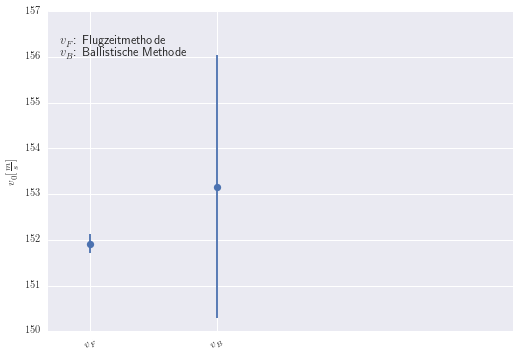

In [22]:
# Plot different methods with sem

x = [1, 4]
y = [
    v1_mean['v_flug'],
    v1_mean['v_ballistic']
]
e = [
    v1_sem['v_flug'],
    v1_systematic_error
]
labels = ['$v_F$', '$v_B$']
fig = plt.figure()
plt.errorbar(x, y, yerr=e, fmt='o')
plt.xlim([0, 11])
#plt.ylim([150, 160])
plt.xticks(x, labels, rotation='35')
plt.ylabel('$v_0 [\\frac{m}{s}]$')
plt.text(-0.026, 0.86,'$v_F $: Flugzeitmethode', transform = ax.transAxes)
plt.text(-0.026, 0.82,'$v_B $: Ballistische Methode', transform = ax.transAxes)
plt.close(fig)

figure = PrettyFigure(fig, label='fig:laufzeiten_luft_v_balllistisch_systematischer_fehler', caption='Die systematischen Fehler der mittleren Geschwindigkeiten der ballistischen und Flugzeitmethode im Vergleich.')
figure.show()

Natürlich kann sofort erkannt werden wie gross der systematische Fehler bei der ballistischen Methode ist. Deswegen wurden so unterschiedliche Ergebnisse für die Projektilgeschwindigkeit erhalten. Die Fehlerbereiche überlappen sich nun und es ist somit okay anzunehmen dass die beiden Rechnungen stimmen wobei die Flugzeitmethode um ein Vielfaches genauer ist.

## Drehstossmethode

Die Mittelwerte der Drehstossethode unterscheiden sich um {{'{0:.2f}'.format(abs(v2_mean['v_flug'] - v2_mean['v_drehstoss']))}}$\frac{m}{s}$. Dies sind zwar nur {{'{0:.2f}'.format((1 - v2_mean['v_flug'] / v2_mean['v_drehstoss']) * 100)}}%, jedoch muss diesem Unterschied auf den Grund gegangen werden.

Zuerst wurde dafür der erneut statistische Fehler gerechnet. Vieleicht liegt dieser ja im akzeptablen Bereich. 

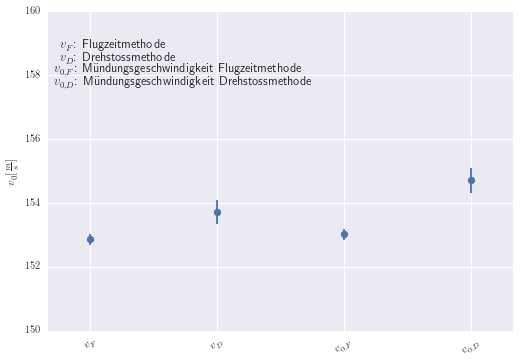

In [26]:
# Plot different methods with sem

v2_mean = v2_df.mean()
v2_sem = v2_df.sem()

v2_flug_muendung_mean = air_resistance(v1_s / 2, v2_mean['v_flug'])
v2_flug_muendung_sem = air_resistance(v1_s / 2, v2_sem['v_flug'])

v2_drehstoss_muendung_mean = air_resistance(v1_sb2, v2_mean['v_drehstoss'])
v2_drehstoss_muendung_sem = air_resistance(v1_sb2, v2_sem['v_drehstoss'])

x = [1, 4, 7, 10]
y = [
    v2_mean['v_flug'],
    v2_mean['v_drehstoss'],
    v2_flug_muendung_mean,
    v2_drehstoss_muendung_mean
]
e = [
    v2_sem['v_flug'],
    v2_sem['v_drehstoss'],
    v2_flug_muendung_sem,
    v2_drehstoss_muendung_sem
]

labels = ['$v_F$', '$v_D$', '$v_{0,F}$', '$v_{0,D}$']
fig = plt.figure()
plt.errorbar(x, y, yerr=e, fmt='o')
plt.xlim([0, 11])
plt.ylim([150, 160])
plt.xticks(x, labels, rotation='35')
plt.ylabel('$v_0 [\\frac{m}{s}]$')
plt.text(-0.026, 0.86,'$v_F $: Flugzeitmethode', transform = ax.transAxes)
plt.text(-0.026, 0.82,'$v_D $: Drehstossmethode', transform = ax.transAxes)
plt.text(-0.04, 0.78,'$v_{0,F}$: Mündungsgeschwindigkeit Flugzeitmethode', transform = ax.transAxes)
plt.text(-0.04, 0.74,'$v_{0,D}$: Mündungsgeschwindigkeit Drehstossmethode', transform = ax.transAxes)
plt.close(fig)

figure = PrettyFigure(fig, label='fig:laufzeiten_luft_v_drehstoss', caption='Die mittleren Geschwindigkeiten der Drehstoss- und Flugzeitmethode im Vergleich mit ihren respektiven mittleren Mündungsgeschwindigkeiten.')
figure.show()

Wie anhand der Fehlerbalken in Grafik \ref{fig:laufzeiten_luft_v_drehstoss} schnell festgestellt werden kann, ist der statistische Fehler relativ gering. Dies bedeutet aber auch, dass der die Fehlerbereiche sich nicht überlappen. Dies ist nicht sehr gut. Denn es gibt nur _eine_ wahre Geschwindigkeit des Projektils. Natürlich kann diese nie genau bestimmt werden. Da sich aber die Fehlerbereiche nicht überlappen muss eine Messung falsch sein oder der systematische Fehler erneut viel grösser sein.

Deswegen wurde auch eine Fehlerfortpflanzungsrechnung für die Drehstossmethode gemacht. Für die Flugzeitmethode ist diese nicht sehr aussagekräftig da die Messfehler sehr gering sind. Bei der ballistischen Methode wurde jedoch von Auge ungefähr ein Wert in Bewegung abgelesen. Dies führt natürlich zu hoher Ungenauigkeit. Da $M$ und $m$ sowie auch $g$ durch sehr genaue Messinstrumente bestimmt werden konnten werden diese in der Fehlerfortpflanzungsrechnung vernachlässigt.

Somit ist der resultierende systematische Fehler durch Gleichung \ref{eq:ffg_pendel} gegeben.

\begin{equation}
S_{v,sys}=\sqrt{(\frac{\partial v}{\partial T})^2 + (\frac{\partial v}{\partial x})^2 + (\frac{\partial v}{\partial a})^2}
= \sqrt{
\bigg(\frac{g}{2\pi}\cdot\frac{M+m}{m}\cdot\frac{x}{a}\cdot\bigg[1-\frac{3}{8}\cdot\Big(\frac{x}{a}\Big)^2\bigg]s_t\bigg)^2
+ \bigg(\frac{g}{2\pi}\cdot\frac{M+m}{m}\cdot T\cdot\frac{1}{a}\cdot\bigg[1-\frac{9}{8}\cdot\Big(\frac{x}{a}\Big)^2\bigg]s_x\bigg)^2
+ \bigg(\frac{g}{2\pi}\cdot\frac{M+m}{m}\cdot T\cdot\frac{x}{a^2}\cdot\bigg[1-\frac{9}{8}\cdot\Big(\frac{x}{a}\Big)^2\bigg]s_a\bigg)^2}
\label{eq:ffg_pendel}
\end{equation}

# Ergebnisse

70% der Ergebnissle liegen innerhalb der Standardabweichung. Dies ist ein Bisschen mehr als die erwarteten 68%. Natürlich wurden viel zuwenige Messungen gemacht als dass die 68% jemals erreicht werden könnten. Somit ist 70% also schon ein sehr gutes Ergebnis!